### Customer Profiling

This activity is meant to give you practice exploring data including the use of visualizations with `matplotlib`, `seaborn`, and `plotly`.  The dataset contains demographic information on the customers, information on customer purchases, engagement of customers with promotions, and information on where customer purchases happened.  A complete data dictionary can be found below.  

Your task is to explore the data and use visualizations to inform answers to specific questions using the data.  The questions and resulting visualization should be posted in the group discussion related to this activity.  Some example problems/questions to explore could be:

-----

- Does income differentiate customers who purchase wine? 
- What customers are more likely to participate in the last promotional campaign?
- Are customers with children more likely to purchase products online?
- Do married people purchase more wine?
- What kinds of purchases led to customer complaints?

-----

### Data Dictionary

Attributes


```
ID: Customer's unique identifier
Year_Birth: Customer's birth year
Education: Customer's education level
Marital_Status: Customer's marital status
Income: Customer's yearly household income
Kidhome: Number of children in customer's household
Teenhome: Number of teenagers in customer's household
Dt_Customer: Date of customer's enrollment with the company
Recency: Number of days since customer's last purchase
Complain: 1 if customer complained in the last 2 years, 0 otherwise


MntWines: Amount spent on wine in last 2 years
MntFruits: Amount spent on fruits in last 2 years
MntMeatProducts: Amount spent on meat in last 2 years
MntFishProducts: Amount spent on fish in last 2 years
MntSweetProducts: Amount spent on sweets in last 2 years
MntGoldProds: Amount spent on gold in last 2 years
Promotion


AcceptedCmp1: 1 if customer accepted the offer in the 1st campaign, 0 otherwise
AcceptedCmp2: 1 if customer accepted the offer in the 2nd campaign, 0 otherwise
AcceptedCmp3: 1 if customer accepted the offer in the 3rd campaign, 0 otherwise
AcceptedCmp4: 1 if customer accepted the offer in the 4th campaign, 0 otherwise
AcceptedCmp5: 1 if customer accepted the offer in the 5th campaign, 0 otherwise
Response: 1 if customer accepted the offer in the last campaign, 0 otherwise


NumWebPurchases: Number of purchases made through the company’s web site
NumCatalogPurchases: Number of purchases made using a catalogue
NumStorePurchases: Number of purchases made directly in stores
NumWebVisitsMonth: Number of visits to company’s web site in the last month
```

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data = pd.read_csv('data/marketing_campaign.csv', sep = '\t')

In [3]:
df = data.copy()

df['Age'] = 2024 - df['Year_Birth']
df = df.drop(['Year_Birth'], axis=1)

df = df[df['Age'] < 100]

df = df[(df['Income'] < 140000) & (df['Income'] > 10000)]

df['children_at_home'] = df['Kidhome'] + df['Teenhome']
df = df.drop(['Kidhome', 'Teenhome'], axis=1)

df['Response'] = df['Response'].map({1: 'Yes', 0: 'No'})

df['Marital_Status'] = df['Marital_Status'].apply(lambda x: 'Married' if x == 'Married' or x == 'Together' else 'Single')
df = df.drop(['AcceptedCmp1', 'AcceptedCmp2', 'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5'], axis=1)

df = df.drop(['ID', 'Dt_Customer'], axis=1)

df.head()

,Education,Marital_Status,Income,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,...,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,Complain,Z_CostContact,Z_Revenue,Response,Age,children_at_home
0,Graduation,Single,58138.0,58,635,88,546,172,88,88,...,8,10,4,7,0,3,11,Yes,67,0
1,Graduation,Single,46344.0,38,11,1,6,2,1,6,...,1,1,2,5,0,3,11,No,70,2
2,Graduation,Married,71613.0,26,426,49,127,111,21,42,...,8,2,10,4,0,3,11,No,59,0
3,Graduation,Married,26646.0,26,11,4,20,10,3,5,...,2,0,4,6,0,3,11,No,40,1
4,PhD,Married,58293.0,94,173,43,118,46,27,15,...,5,3,6,5,0,3,11,No,43,1


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2176 entries, 0 to 2239
Data columns (total 21 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Education            2176 non-null   object 
 1   Marital_Status       2176 non-null   object 
 2   Income               2176 non-null   float64
 3   Recency              2176 non-null   int64  
 4   MntWines             2176 non-null   int64  
 5   MntFruits            2176 non-null   int64  
 6   MntMeatProducts      2176 non-null   int64  
 7   MntFishProducts      2176 non-null   int64  
 8   MntSweetProducts     2176 non-null   int64  
 9   MntGoldProds         2176 non-null   int64  
 10  NumDealsPurchases    2176 non-null   int64  
 11  NumWebPurchases      2176 non-null   int64  
 12  NumCatalogPurchases  2176 non-null   int64  
 13  NumStorePurchases    2176 non-null   int64  
 14  NumWebVisitsMonth    2176 non-null   int64  
 15  Complain             2176 non-null   int64 

### Does income differentiate customers who purchase wine?

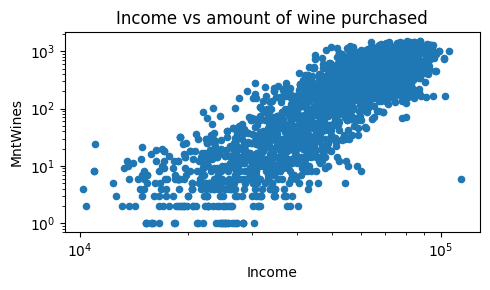

In [5]:
f, ax = plt.subplots(figsize=(5,3))
df.plot(x = 'Income', y = 'MntWines', kind = 'scatter', ax=ax)
plt.title('Income vs amount of wine purchased')
plt.xscale('log')
plt.yscale('log')
plt.tight_layout()
plt.savefig('try-it_4.1-income.png')
plt.show()

### What customers are more likely to participate in the last promotional campaign?

In [6]:
def list_rates(df, A, B):
    counts = df[[A, B]].value_counts(normalize=True, sort=False).reset_index()
    print(f"{A}:")
    for key in counts[A].unique():
        yes = counts.loc[(counts[A] == key) & (counts[B] == 'Yes')]['proportion'].values[0]
        no  = counts.loc[(counts[A] == key) & (counts[B] == 'No')]['proportion'].values[0]
        print(f'Acceptance rate for "{key}": {100*yes/(yes+no):.1f}')

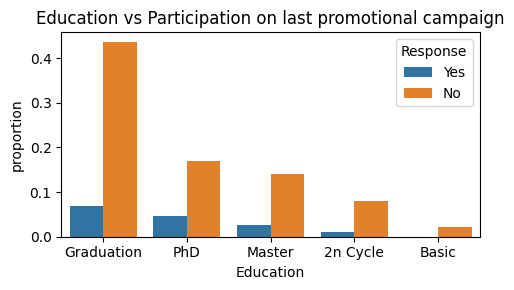

In [7]:
plt.figure(figsize=(5,3))
sns.countplot(df, x='Education', hue='Response', stat='proportion')
plt.title('Education vs Participation on last promotional campaign')
plt.tight_layout()
plt.savefig('try-it_4.1-campaign.png')
plt.show()


In [8]:
list_rates(df, 'Education', 'Response')

Education:
Acceptance rate for "2n Cycle": 10.8
Acceptance rate for "Basic": 2.0
Acceptance rate for "Graduation": 13.7
Acceptance rate for "Master": 15.5
Acceptance rate for "PhD": 21.4


### Are customers with children more likely to purchase products online?

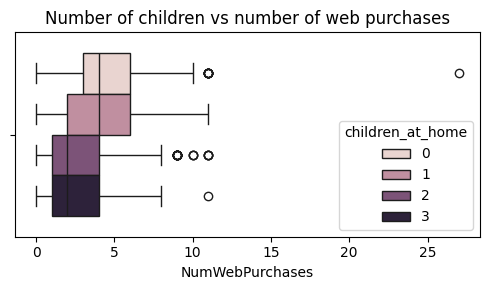

In [9]:
plt.figure(figsize=(5,3))
sns.boxplot(df, x='NumWebPurchases', hue='children_at_home')
plt.title('Number of children vs number of web purchases')
plt.tight_layout()
plt.savefig('try-it_4.1-children.png')
plt.show()

### What kinds of purchases led to customer complaints?

In [10]:
complaints = df.loc[df['Complain'] == 1, ['NumWebPurchases', 'NumCatalogPurchases', 'NumStorePurchases']].reset_index(drop=True)

In [11]:
complaints.sum(axis=0)

NumWebPurchases         74
NumCatalogPurchases     42
NumStorePurchases      108
dtype: int64

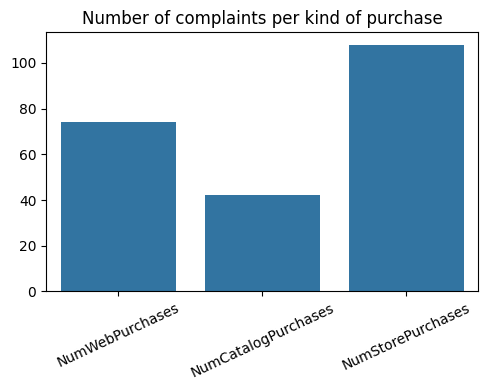

In [12]:
plt.figure(figsize=(5,4))
sns.barplot(complaints.sum())
plt.title('Number of complaints per kind of purchase')
plt.xticks(rotation=25)
plt.tight_layout()
plt.savefig('try-it_4.1-complaints.png')
plt.show()